In [1]:
# This notebook was written for Python 3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats as stats

%matplotlib inline

In [2]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)
purples = sns.color_palette('Purples', 9)
prs = sns.color_palette('PRGn', 9)
tanteals = sns.color_palette('BrBG', 9)
pinkgreens = sns.color_palette('PiYG', 9)[::-1]


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}
bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

In [3]:
wt = pd.read_csv('raw/2016_01_15_s1_unique_cell_data.txt', delimiter = '\t', skiprows = 2)

wt = wt[wt['cell volume (um^3)'] > 20]
wt = wt[wt['artifacts'] < 5]

In [4]:
wt.head()

,image path,cellID,genotype,time,total number of mitochondria,total mitochondrial volume (um^3),total mitochondrial surface area (um^2),total normalized shape index,total sphericity,total length (um),...,volume-weighted average NSI of mitochondrion,volume-weighted average sphericity of mitochondrion,average compactedness of mitochondrion,volume-weighted average compactedness of mitochondrion,average width (um),std width (um),number of endpoints,artifacts,cell volume (um^3),mito/cell volume ratio
0,1_15_16_yLB126_MOPSO_yLB146_yLB207_cellasics_0...,2016011501001,wildtype,-60,6,6.296690,47.586554,1.698749,0.346530,17.07011,...,1.303516,0.597214,124.459074,23.856149,0.42954,0.09252,12.0,0,96.7505,0.065082
1,1_15_16_yLB126_MOPSO_yLB146_yLB207_cellasics_0...,2016011501001,wildtype,-60,6,6.296690,47.586554,1.698749,0.346530,17.07011,...,1.303516,0.597214,124.459074,23.856149,0.42954,0.09252,12.0,0,96.7505,0.065082
2,1_15_16_yLB126_MOPSO_yLB146_yLB207_cellasics_0...,2016011501002,wildtype,-60,1,1.911647,13.891363,1.365613,0.536222,6.30091,...,1.365613,0.536222,27.083795,27.083795,0.40300,0.08907,1.0,0,30.9045,0.061857
3,1_15_16_yLB126_MOPSO_yLB146_yLB207_cellasics_0...,2016011501002,wildtype,-60,1,1.911647,13.891363,1.365613,0.536222,6.30091,...,1.365613,0.536222,27.083795,27.083795,0.40300,0.08907,1.0,0,30.9045,0.061857
4,1_15_16_yLB126_MOPSO_yLB146_yLB207_cellasics_0...,2016011501003,wildtype,-60,1,4.005041,29.930341,1.566552,0.407484,12.95016,...,1.566552,0.407484,40.884669,40.884669,0.40225,0.08445,5.0,0,39.6618,0.100980


In [5]:
hettimes = list(wt.time.unique())[:-1]
hettimes = [int(x) for x in hettimes]
hettimes

[-60,
 -45,
 -30,
 -15,
 0,
 15,
 30,
 45,
 60,
 75,
 90,
 105,
 120,
 135,
 150,
 165,
 180,
 195,
 210,
 225,
 240,
 255,
 270,
 285,
 300,
 315,
 330,
 345,
 360,
 375,
 390,
 405,
 420,
 435,
 450,
 465]

## Looking at two classes

In [6]:
base = '2016011501'

arr_6h = [10, 40, 43, 25, 32, 17, 42, 40, 39, 21, 37]
rec_6h = [9, 22, 23, 24, 8, 36, 15, 31, 26, 11, 18, 19, 33, 27, 47, 1, 14, 38, 34, 12, 46, 13, 28, 2,
         16, 44, 45, 4, 5, 29, 41, 4, 7, 6, 35]

In [7]:
arr_ids_6h = [base + '%03.f'%x for x in arr_6h]
rec_ids_6h = [base + '%03.f'%x for x in rec_6h]

df_arr_6h = wt[wt['cellID'].isin(arr_ids_6h)]
df_rec_6h = wt[wt['cellID'].isin(rec_ids_6h)]

arr_6h_mean = df_arr_6h.groupby('time').mean()
arr_6h_std = df_arr_6h.groupby('time').std()

rec_6h_mean = df_rec_6h.groupby('time').mean()
rec_6h_std = df_rec_6h.groupby('time').std()

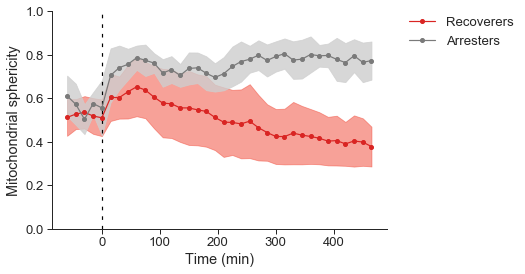

In [8]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

plt.axvline(x = 0, color = 'black', linestyle = (0, (3,5)))


plt.plot(hettimes, [rec_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes],
        marker = '.', color = reds[6], markersize = 8, label = 'Recoverers');
ax.fill_between(hettimes, [rec_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] - rec_6h_std.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes],
                [rec_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] + rec_6h_std.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes], color = reds[5], alpha = 0.5)

plt.plot(hettimes, [arr_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes],
        marker = '.', color = grays[5], markersize = 8, label = 'Arresters');
ax.fill_between(hettimes, [arr_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] - arr_6h_std.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes],
                [arr_6h_mean.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] + arr_6h_std.loc[str(x)]['volume-weighted average sphericity of mitochondrion'] for x in hettimes], color = grays[2], alpha = 0.8)
        

ax.set_ylim(0, 1)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Mitochondrial sphericity')

sns.despine()

ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0, frameon = False);

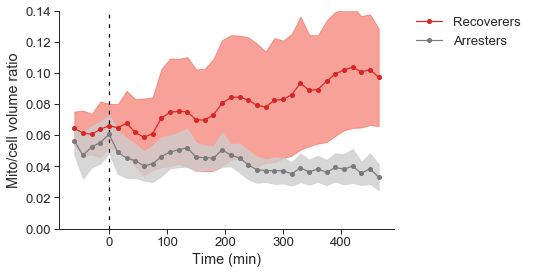

In [9]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

plt.axvline(x = 0, color = 'black', linestyle = (0, (3,5)))
   

plt.plot(hettimes, [rec_6h_mean.loc[str(x)]['mito/cell volume ratio'] for x in hettimes],
        marker = '.', color = reds[6], markersize = 8, label = 'Recoverers');
ax.fill_between(hettimes, [rec_6h_mean.loc[str(x)]['mito/cell volume ratio'] - rec_6h_std.loc[str(x)]['mito/cell volume ratio'] for x in hettimes],
                [rec_6h_mean.loc[str(x)]['mito/cell volume ratio'] + rec_6h_std.loc[str(x)]['mito/cell volume ratio'] for x in hettimes], color = reds[5], alpha = 0.5)



plt.plot(hettimes, [arr_6h_mean.loc[str(x)]['mito/cell volume ratio'] for x in hettimes],
        marker = '.', color = grays[5], markersize = 8, label = 'Arresters');
ax.fill_between(hettimes, [arr_6h_mean.loc[str(x)]['mito/cell volume ratio'] - arr_6h_std.loc[str(x)]['mito/cell volume ratio'] for x in hettimes],
                [arr_6h_mean.loc[str(x)]['mito/cell volume ratio'] + arr_6h_std.loc[str(x)]['mito/cell volume ratio'] for x in hettimes], color = grays[2], alpha = 0.8)
     

ax.set_ylim(0, 0.14)
ax.set_xlabel('Time (min)')
ax.set_ylabel('Mito/cell volume ratio')

sns.despine()

ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0, frameon = False);